In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as sla

## Task 1

$$ f(x) = \frac{1}{2} x^T Ax - b^T x + c = \frac{1}{2}(Ax, x) - (b, x) + c $$

$$ \nabla f(x) = \frac{1}{2}(\nabla Ax)x + \frac{1}{2} Ax(\nabla x) - b(\nabla x) = Ax - b = 0 \quad \rightarrow \quad Ax_* = b \text{ - доставляет экстремум формы}$$

Докажем, что $x_*$ - минимум:

$$
\begin{gathered}
f(x+\boldsymbol{\xi})=\frac{1}{2}(\mathbf{A}(x+\xi),(x+\xi))-(\mathbf{f}, x+\xi)+C= \\
=\frac{1}{2}((\mathbf{A x}, x)+(\mathbf{A} \xi, x)+(\mathbf{A} x, \boldsymbol{\xi})+(\mathbf{A} \xi, \xi))-(\mathbf{f}, x)-(\mathbf{f}, \boldsymbol{\xi})+C= \\
[\mathbf{A}=\mathbf{A}^*=>(\mathbf{A} \xi, x)=(\xi, \mathbf{A})=(\mathbf{A X}, \xi)] \\
=\left(\frac{1}{2}(\mathbf{A x}, x)+\frac{1}{2}(\mathbf{A} \xi, \xi)\right)+(\mathbf{A x}, \boldsymbol{\xi})-(\mathbf{f}, \boldsymbol{\xi})-(\mathbf{f}, x)+C= \\
=f(x)+(\mathbf{A x}-\mathbf{f}, \xi)+\frac{1}{2}(\mathbf{A} \xi, \xi)=f(x)+\frac{1}{2}(\mathbf{A} \xi, \xi)
\end{gathered}
$$


Итак, мы двигаемся по направлению градиента, тогда шаг будет выглядеть как:
$$
x^1=x^0-\tau_0 \nabla f\left(x^0\right)
$$
$\tau_0$ - итерационный параметр, указывающий на величину шага в направлении градиента
$$
x^1=x^0-\tau_0\left(\mathbf{A x}^0-\mathbf{f}\right)=x^0+\tau_0 \mathbf{r}^0
$$

Вычислим размер шага $\tau$

$$
\begin{aligned}
& f\left(x^1\right)=f\left(x^0+\tau_0 \mathbf{r}^0\right)= \\
& =\frac{1}{2}\left(\mathbf{A}\left(x^0+\tau_0 \mathbf{r}^0\right),\left(x^0+\tau_0 \mathbf{r}^0\right)\right)-\left(\mathbf{f}, x^0+\tau_0 \mathbf{r}^0\right)+C \\
& \frac{d f\left(x^1\right)}{d \tau_0}=\left(\mathbf{A r}^0, x^0\right)+\tau_0\left(\mathbf{A} \mathbf{r}^0, \mathbf{r}^0\right)-\left(\mathbf{f}, \mathbf{r}^0\right)= \\
& =\left(\mathbf{A x}^0-\mathbf{f}, \mathbf{r}^0\right)+\tau_0\left(\mathbf{A r}^0, \mathbf{r}^0\right)=\mathbf{0} \\
&  \quad \Rightarrow \tau_0=\frac{\left(\mathbf{r}^0, \mathbf{r}^0\right)}{\left(\mathbf{A} \mathbf{r}^0, \mathbf{r}^0\right)} \\
&
\end{aligned}
$$

Аналогично для остальных шагов $i \rightarrow i+1 $

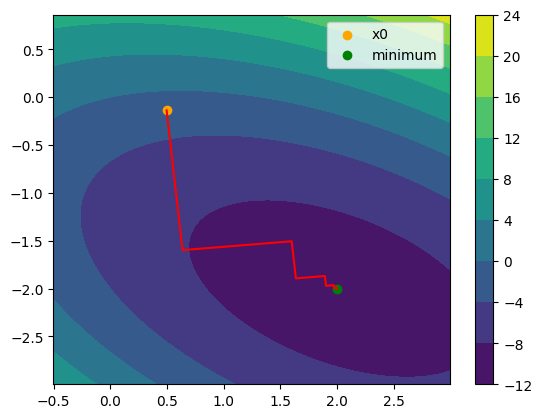

In [92]:
np.random.seed(42)
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
x0 = np.random.randn(2)

func = lambda A, b, x, y: 1.5* x**2 + 2*x*y + 3*y**2 - 2*x + 8*y

def steepest_descent(A, b, steps):
    path = np.zeros((steps+1, 2))
    path[0,:] = x0
    x = x0
    for i in range(1, steps+1):
        r = A.dot(x) - b
        tau = r.dot(r) / r.dot(A.dot(r))
        x = x - tau * r
        path[i, :] = x
    return path

path = steepest_descent(A, b, 20)
solution = np.linalg.inv(A) @ b

xlist = np.linspace(min(path[:,0])-1, max(path[:,0])+1, 100)
ylist = np.linspace(min(path[:,1])-1, max(path[:,1])+1, 100)
X, Y = np.meshgrid(xlist, ylist)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, func(A, b, X, Y))
plt.plot(path[:,0], path[:, 1], color = 'red')
plt.scatter(path[0, 0], path[0,1], label='x0', c='orange')
plt.scatter(solution[0],solution[1], label='minimum', c='green')
fig.colorbar(cp)
plt.legend()
plt.show()

## Task 2

In [2]:
n = 10
ex = np.ones(n)
A = sp.sparse.spdiags(np.vstack((-ex, 2 * ex, -ex)), [-1, 0, 1], n, n, 'csr')
rhs = np.random.normal(size=n)

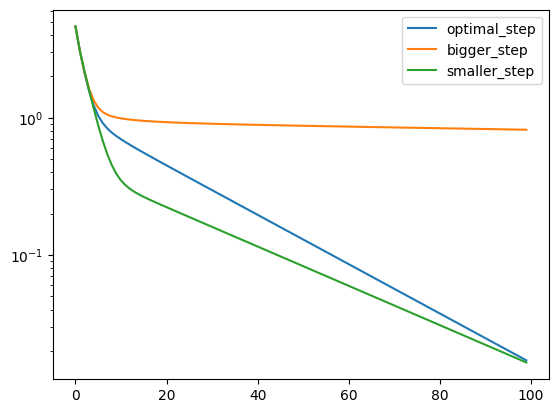

In [3]:
# richardson iteration
lam_max = sla.eigsh(A, k=1, which='LA', return_eigenvectors=False)
lam_min = sla.eigsh(A, k=1, which='SA', return_eigenvectors=False)
tau = 2.0 / (lam_max + lam_min)

def richardson(steps, tau):
    x = np.zeros(n)
    res = []
    for i in range(steps):
        r = A.dot(x) - rhs
        x = x - tau * r
        res.append(np.linalg.norm(r))
    return res

plt.plot(richardson(100, tau), label = 'optimal_step')
plt.plot(richardson(100, tau * 1.02), label = 'bigger_step')
plt.plot(richardson(100, tau * 0.8), label = 'smaller_step')
plt.yscale('log')
plt.legend()

## Task 3

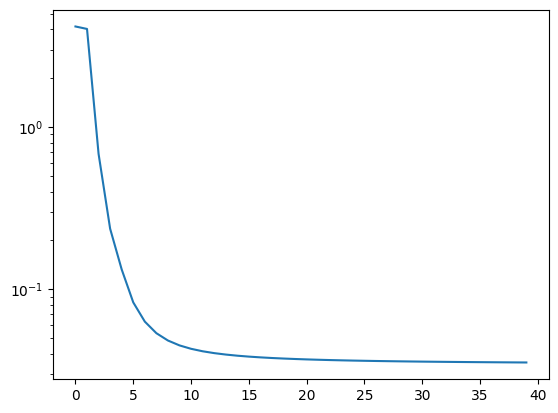

In [4]:
def CG(A, rhs, x, steps):
    res = []
    r = A.dot(x) - rhs
    d = r.copy()
    d_array = [d]
    for i in range(steps):
        alpha = r.dot(r) / d.dot(A @ d)
        x = x - alpha * r
        r_next = A.dot(x) - rhs
        beta = r_next.dot(r_next) / r.dot(r)
        d = r_next + beta * d
        d_array.append(d)
        res = np.append(res, np.linalg.norm(r_next))
        r = r_next
    return res, d_array


A = np.array([[3, 2], [2, 6]])
rhs = np.array([2, -8])
x0 = np.array([0, 0])
res, d_array = CG(A, rhs, x0, 40)

plt.plot(res)
plt.yscale('log')

In [5]:
N = 10
D = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        D[i,j] = d_array[i].T @ A.dot(d_array[j])
D

array([[ 3.32000000e+02, -7.10542736e-15,  1.81811481e+02,
         9.79923489e+00,  7.26092144e+00,  1.69879167e+00,
         1.91145087e+00,  1.84698353e+00,  1.93299796e+00,
         2.10608222e+00],
       [-7.10542736e-15,  4.99286902e+01,  2.47865002e+01,
         7.37689810e+00,  2.21451689e+00,  2.17073586e+00,
         1.53661570e+00,  1.45126386e+00,  1.52495341e+00,
         1.67240724e+00],
       [ 1.81811481e+02,  2.47865002e+01,  1.11869463e+02,
         9.02847815e+00,  5.07563208e+00,  2.00793651e+00,
         1.80959264e+00,  1.73191681e+00,  1.81560275e+00,
         1.98358970e+00],
       [ 9.79923489e+00,  7.37689810e+00,  9.02847815e+00,
         1.37915890e+00,  5.41503620e-01,  3.70864499e-01,
         2.83450883e-01,  2.68937457e-01,  2.82363773e-01,
         3.09258597e-01],
       [ 7.26092144e+00,  2.21451689e+00,  5.07563208e+00,
         5.41503620e-01,  2.57019918e-01,  1.33432929e-01,
         1.09958330e-01,  1.04762752e-01,  1.09912305e-01,
         1.

## Task 4

In [6]:
import pickle
from scipy.sparse.linalg import LinearOperator, cg
from scipy.linalg import norm
with open(r"../data/data.pkl", "rb") as input_file:
    data = pickle.load(input_file)

No, I'm not abe to allocatte this matrix and work with it as usual.

In [7]:
d, v, s, b = data['d'], data['v'], data['s'], data['b']
v1 = np.array(v[:, 0])
v2 = np.array(v[:,1])
d = np.array(d)

np.diag(d) + s[0]*v1.multiply(v1.T) + s[1]*v2.multiply(v2.T)

MemoryError: Unable to allocate 18.6 GiB for an array with shape (50000, 50000) and data type float64

In [8]:
# making Liner Operator
def matvec_prod(x):
    v1x = v1 @ x
    v2x = v2 @ x
    return np.multiply(x, d) + s[0]*v1x*v1 + s[1]*v2x*v2

A = LinearOperator(shape=(50000,50000), matvec=matvec_prod)

res = cg(A,b, maxiter=1000) # Solving with Conjugate Gradient Method
x = res[0]
print(f' ||Ax - b|| / ||x|| = {norm(A.matvec(x)) / norm(x)}')

 ||Ax - b|| / ||x|| = 0.08833600335545917


## Task 6

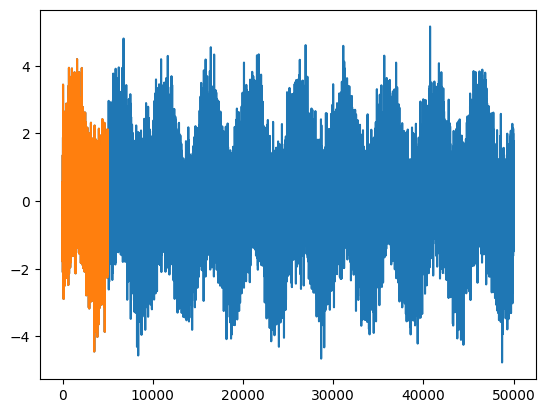

In [9]:
from matplotlib import pyplot as plt
y = np.load('../data/y.npy')
plt.plot(y)
np.random.seed(42)
n = 10
M = 5000
Y = np.reshape(y, (n, M))
plt.plot(Y[0])

#### Analytical solution
$$
F = \sum_{i=0}^{t-1}|| y_i - Y_{i\ mod\ T}||^{2} =
\sum_{i=0}^{t-1} (y_i - Y_{i\ mod\ T})^{2}
$$

$$
\frac{dF}{dYi} = -2\sum_{i=0}^{t-1} (y_i - Y_{i\ mod\ T}) = 0
\quad \rightarrow \quad
\sum_{i=0}^{t-1}y_i = n \sum_{j=0}^{T-1} Y_j
\quad \rightarrow \quad
Y_{opt}^j = \frac{1}{n}\sum_{k=0}^{n} y_{jk}
$$

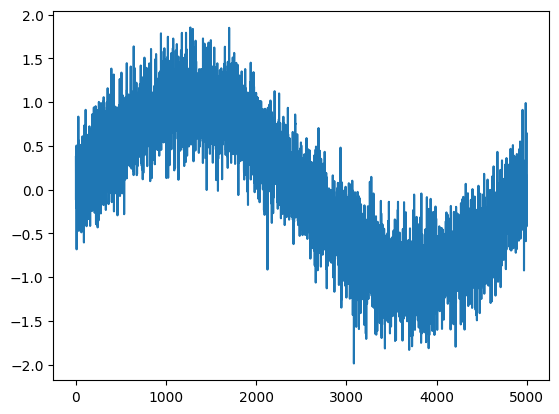

In [10]:
y_opt = Y.mean(axis=0)
plt.plot(y_opt)

#### Solution with smoothing

$$
F = \sum_{i=0}^{t-1} (y_i - Y_{i\ mod\ T})^{2} + \sum_{i=0}^{T-1}\gamma\left(Y_i-Y_{i-1}\right)^{2}
$$

$$
\frac{d F}{d Y i}=2 \sum_{k=1}^{n=10}\left(Y_i-y_{k i}\right)+2 \gamma\left(Y_i-Y_{i-1}\right)+2 \gamma\left(Y_{i+1}-Y_i\right)=0 \quad \rightarrow \quad  -\gamma Y_{i-1} + (n+2 \gamma)Y_i - \gamma Y_{i+1}=\sum_{k=1}^{n=10} y_{k i}
$$

$$ A[i, i-1],\ A[i, i],\ A[i, i+1] = -\gamma,\ (n+2 \gamma),\ -\gamma; \quad b_i = \sum_{k=1}^{n=10} y_{k i}$$

In [60]:
from scipy.sparse import dia_matrix

def smoothing(gamma):
    arr = np.ones(M)
    diags = np.array([-gamma*arr, (n + 2*gamma)*arr, -gamma*arr])
    A = dia_matrix((diags, [-1,0,1]), shape=(M, M)).tocsr()
    b = Y.sum(axis=0)
    solution = cg(A, b, maxiter=100)
    plt.plot(solution[0], label = gamma)
    plt.legend()

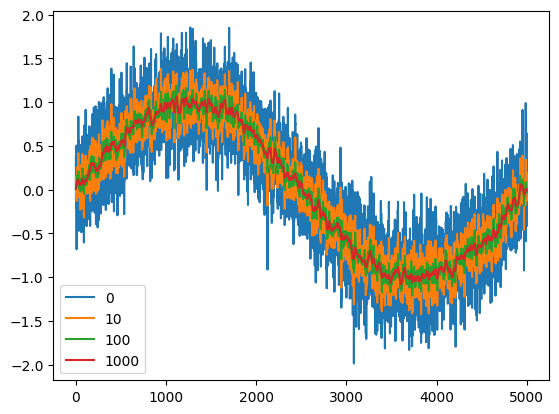

In [61]:
smoothing(0)
smoothing(10)
smoothing(100)
smoothing(1000)

## Task 5

In [77]:
def woodbury(A, U, V):
    Ainv = np.linalg.inv(A)
    X = V @ Ainv @ U
    X = X + np.eye(X.shape[0])
    return Ainv - Ainv @ U @ np.linalg.inv(X) @ V @ Ainv

straight = lambda A, U, V : np.linalg.inv(A + U @ V)

p = 5000
k = 100
A = 10 * np.diag(np.random.rand(p))
U = 1e-2 * np.random.rand(p, k)
V = 1e-2 * np.random.rand(k, p)

In [68]:
%timeit straight(A, U, V)

2.32 s ± 239 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
%timeit woodbury(A, U, V)

4.02 s ± 334 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
